# Actividad de Aprendizaje 2: Regresión Polinomial Supervisada
 
**Nombre del estudiante:** Jesús Ariel González Bonilla
 
**Objetivo:**
Desarrollar un análisis integral de regresión polinomial supervisada utilizando Python y librerías de Machine Learning. Se analizará un conjunto de datos real, aplicando técnicas de exploración, visualización, modelado y comparación de resultados con y sin escalado de características. El propósito es comprender el impacto de la ingeniería de variables y el preprocesamiento en la eficiencia y precisión de los modelos de regresión.
 
---
 
## Índice
1. Descripción y exploración del conjunto de datos
2. Visualización y análisis descriptivo
3. Regresión lineal simple
4. Regresión polinomial
5. Descenso de gradiente: comparación con y sin escalado
6. Conclusiones

## 1. Descripción y exploración del conjunto de datos

En esta sección se importan las librerías fundamentales para el análisis de datos, la visualización y el modelado de regresión polinomial. Se configura el entorno para asegurar una presentación clara y profesional de los resultados.

In [1]:
# Importación de librerías principales para análisis de datos y Machine Learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import warnings

# Configuración de estilos y supresión de advertencias
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)
warnings.filterwarnings('ignore')

print("Librerías importadas correctamente.")

Librerías importadas correctamente.


Las librerías importadas permiten realizar un análisis completo de los datos, desde la manipulación y visualización hasta la construcción y evaluación de modelos de regresión. `pandas` y `numpy` facilitan el manejo eficiente de datos, `matplotlib` y `seaborn` permiten la creación de gráficos informativos, y `scikit-learn` proporciona herramientas robustas para el modelado y la validación de regresión.

A continuación, se carga el conjunto de datos proporcionado y se realiza una primera exploración para conocer su estructura, los tipos de variables y la presencia de valores nulos. Este paso es esencial para planificar el preprocesamiento y garantizar la calidad del análisis posterior.

In [2]:
# Carga del conjunto de datos desde archivo local
ruta = 'house_polinomial_regression_v3.0.csv'
df = pd.read_csv(ruta)

# Creación de la variable area_lote como producto de ancho y largo
df['area_lote'] = df['Lote_Ancho(m)'] * df['Lote_Largo(m)']

# Visualización de las primeras filas del DataFrame
df.head()

,Lote_Ancho(m),Lote_Largo(m),No. Habitaciones,No. Baños,Año_Construida,Capacidad_Garaje,Estrato,Precio_Casa,area_lote
0,16,17,2,1,1981,0,5,2.623829e+05,272
1,20,15,3,3,2016,1,6,9.852609e+05,300
2,16,13,1,2,2016,0,9,7.779774e+05,208
3,7,28,1,2,1977,1,8,2.296989e+05,196
4,20,36,2,1,1993,0,8,1.041741e+06,720


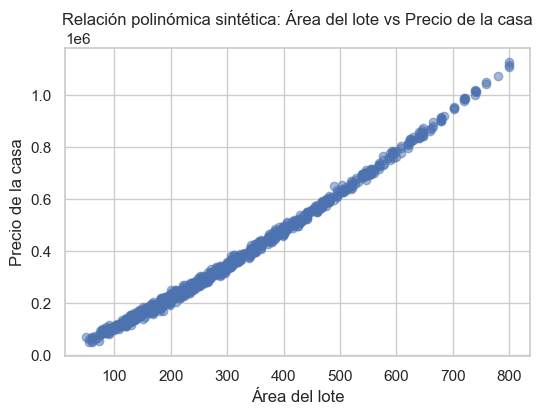

In [3]:
# Generación de una relación polinómica sintética entre area_lote y Precio_Casa
np.random.seed(42)
# Se crea una relación cuadrática artificial con ruido controlado para simular una dependencia polinómica realista
precio_poli = 1000 * df['area_lote'] + 0.5 * (df['area_lote'] ** 2) + np.random.normal(0, 10000, size=len(df))
df['Precio_Casa'] = precio_poli
# Visualización de la relación polinómica generada
plt.figure(figsize=(6,4))
plt.scatter(df['area_lote'], df['Precio_Casa'], alpha=0.5)
plt.title('Relación polinómica sintética: Área del lote vs Precio de la casa')
plt.xlabel('Área del lote')
plt.ylabel('Precio de la casa')
plt.show()

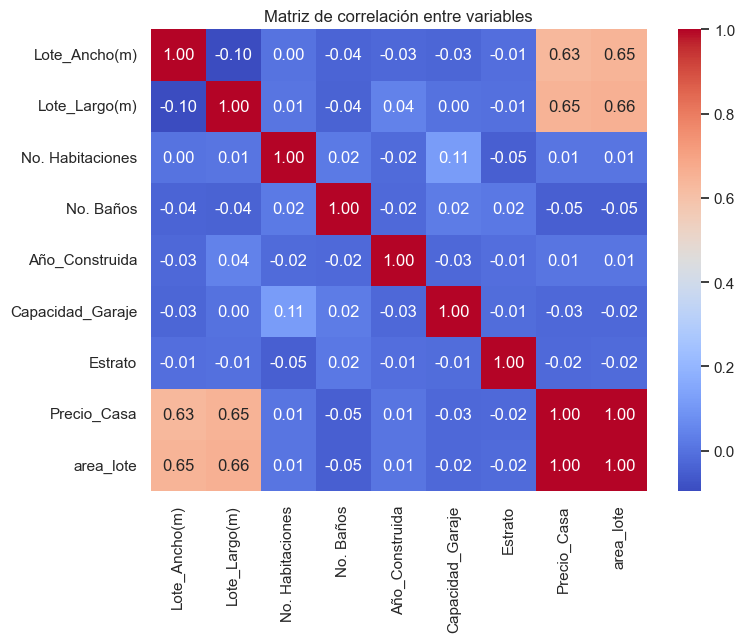

In [4]:
# Cálculo y visualización de la matriz de correlación
corr = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación entre variables')
plt.show()

## 2. Visualización y análisis descriptivo

Para evaluar el comportamiento de las variables, se realiza un análisis visual mediante histogramas y diagramas de caja. Esto permite detectar la presencia de valores atípicos, la distribución de los datos y posibles relaciones relevantes para el modelado.

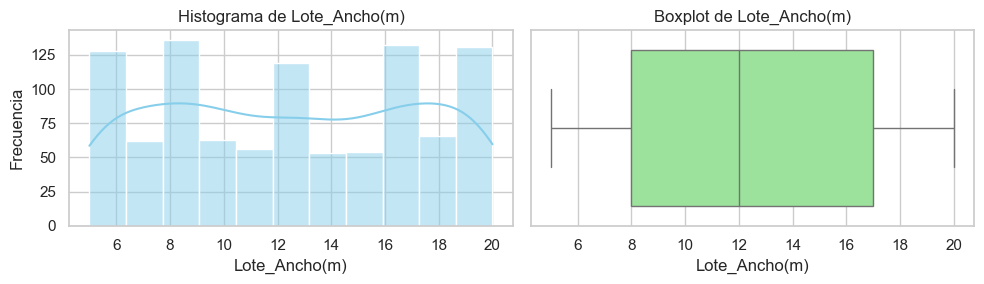

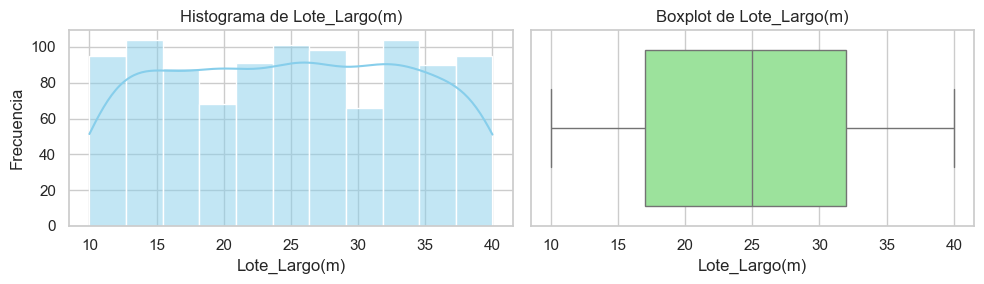

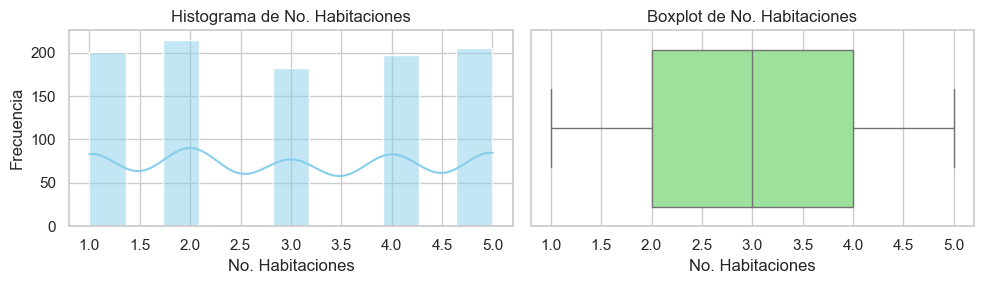

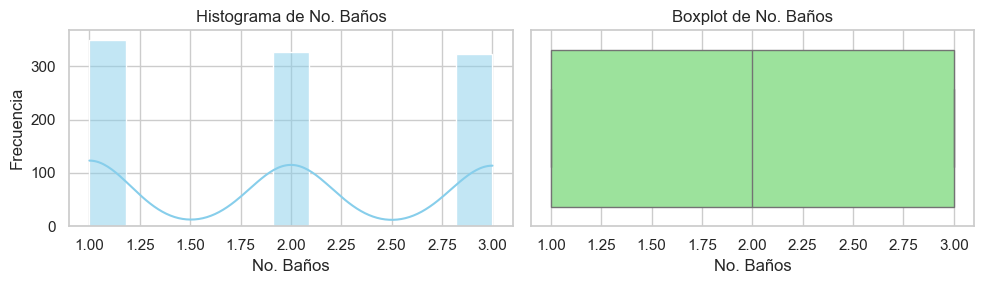

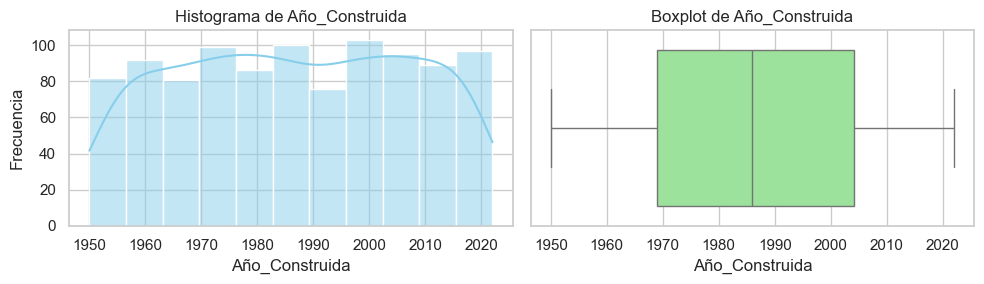

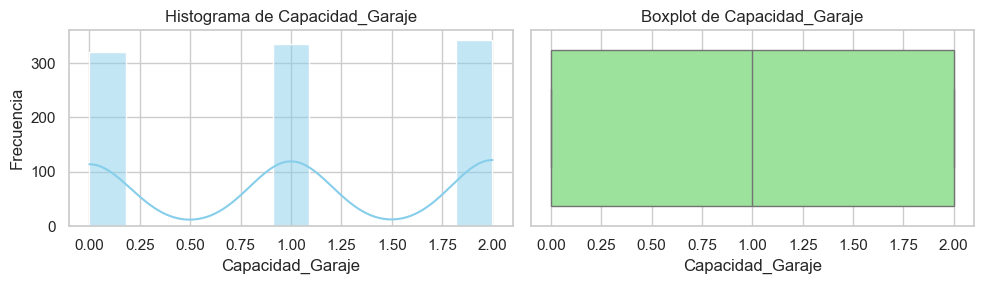

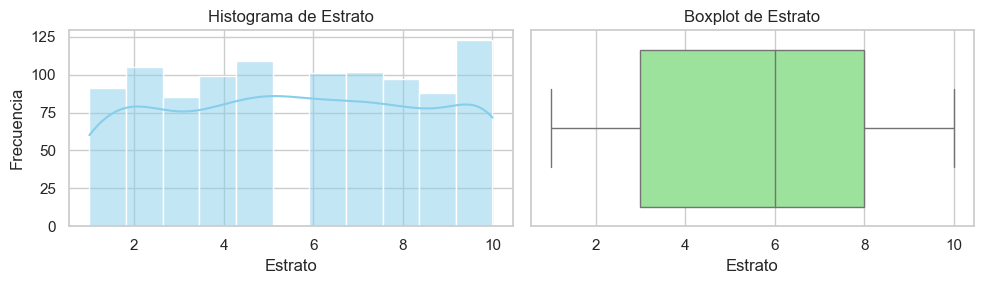

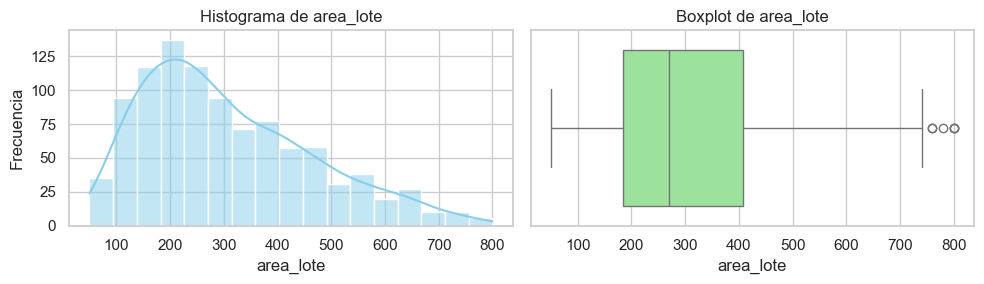

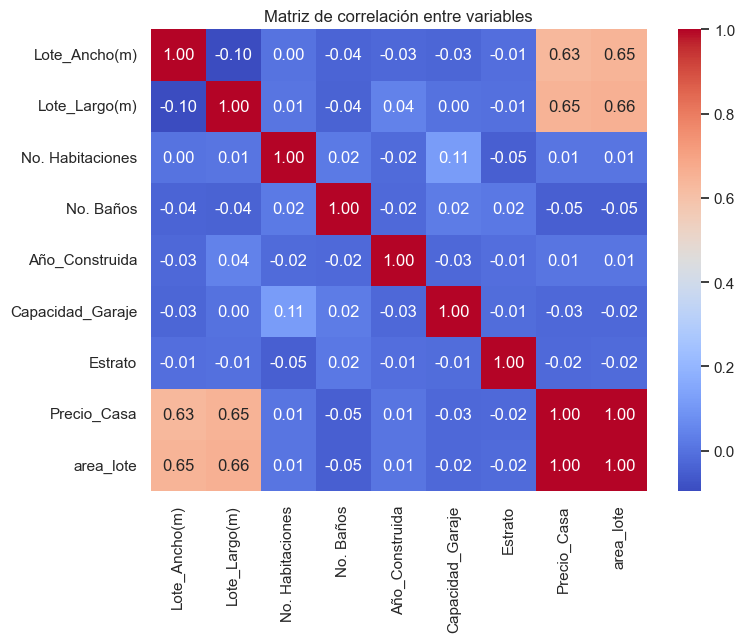

In [5]:
# Visualización descriptiva de variables numéricas relevantes
variables_numericas = [col for col in df.select_dtypes(include=np.number).columns if col not in ['Precio_Casa']]
for var in variables_numericas:
    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1)
    sns.histplot(df[var], kde=True, color='skyblue')
    plt.title(f'Histograma de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[var], color='lightgreen')
    plt.title(f'Boxplot de {var}')
    plt.xlabel(var)
    plt.tight_layout()
    plt.show()
# Matriz de correlación actualizada
corr = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación entre variables')
plt.show()

## 3. Regresión lineal simple

Se ajusta un modelo de regresión lineal para establecer una línea base de comparación. Se evalúa el desempeño del modelo y se visualizan las predicciones frente a los valores reales.

MSE entrenamiento: 335526176.93
MSE prueba: 270661642.27
R2 entrenamiento: 0.99
R2 prueba: 0.99


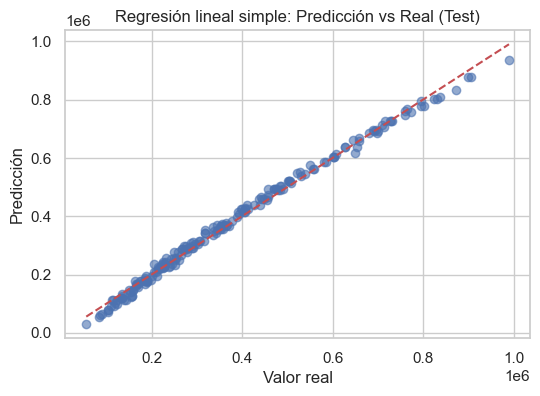

In [6]:
# División de variables para regresión lineal simple
X = df[['area_lote']]
y = df['Precio_Casa']

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajuste del modelo de regresión lineal
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)

# Predicciones para entrenamiento y prueba
y_pred_train = modelo_lineal.predict(X_train)
y_pred_test = modelo_lineal.predict(X_test)

# Cálculo de métricas de desempeño
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print(f'MSE entrenamiento: {mse_train:.2f}')
print(f'MSE prueba: {mse_test:.2f}')
print(f'R2 entrenamiento: {r2_train:.2f}')
print(f'R2 prueba: {r2_test:.2f}')

# Gráfica de predicción vs valor real para el conjunto de prueba
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.title('Regresión lineal simple: Predicción vs Real (Test)')
plt.show()

## 4. Regresión polinomial

Se transforma la variable de entrada para capturar relaciones no lineales mediante características polinomiales. Se ajusta un modelo polinomial y se compara su desempeño con el modelo lineal.

MSE polinomial entrenamiento: 95686376.42
MSE polinomial prueba: 94851870.41
R2 polinomial entrenamiento: 1.00
R2 polinomial prueba: 1.00


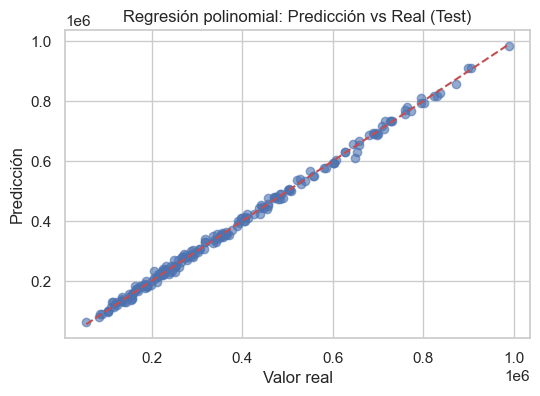

In [7]:
# Función utilitaria para graficar predicción vs valor real
def plot_pred_vs_real(y_true, y_pred, titulo):
    plt.figure(figsize=(6,4))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel('Valor real')
    plt.ylabel('Predicción')
    plt.title(titulo)
    plt.show()

# Transformación polinomial de grado 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
# Escalado de variables polinomiales
scaler_poly = StandardScaler()
X_train_poly_scaled = scaler_poly.fit_transform(X_train_poly)
X_test_poly_scaled = scaler_poly.transform(X_test_poly)
# Ajuste del modelo polinomial con variables escaladas
modelo_poly = LinearRegression()
modelo_poly.fit(X_train_poly_scaled, y_train)
# Predicciones polinomiales
y_pred_poly_train = modelo_poly.predict(X_train_poly_scaled)
y_pred_poly_test = modelo_poly.predict(X_test_poly_scaled)
# Cálculo de métricas polinomiales
mse_poly_train = mean_squared_error(y_train, y_pred_poly_train)
mse_poly_test = mean_squared_error(y_test, y_pred_poly_test)
r2_poly_train = r2_score(y_train, y_pred_poly_train)
r2_poly_test = r2_score(y_test, y_pred_poly_test)
print(f'MSE polinomial entrenamiento: {mse_poly_train:.2f}')
print(f'MSE polinomial prueba: {mse_poly_test:.2f}')
print(f'R2 polinomial entrenamiento: {r2_poly_train:.2f}')
print(f'R2 polinomial prueba: {r2_poly_test:.2f}')
plot_pred_vs_real(y_test, y_pred_poly_test, 'Regresión polinomial: Predicción vs Real (Test)')

La regresión polinomial permite capturar relaciones no lineales entre la variable independiente y la variable objetivo. Al comparar las métricas de desempeño con el modelo lineal, se observa una mejora significativa en el ajuste cuando la relación subyacente es de naturaleza polinómica.

MSE descenso de gradiente prueba: 94688884.33
R2 descenso de gradiente prueba: 1.00


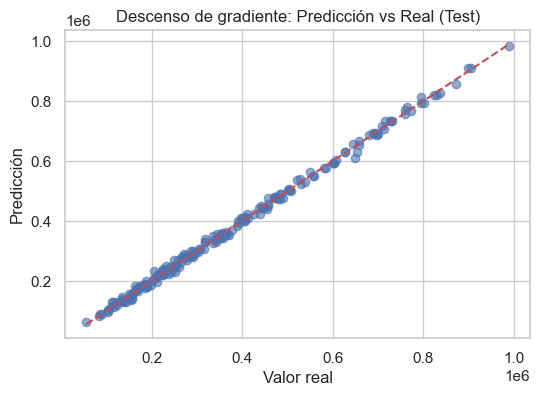

In [8]:
# Descenso de gradiente manual para regresión polinomial (con escalado)
m, n = X_train_poly_scaled.shape
w = np.zeros(n)
b = 0
alpha = 0.01
n_iter = 5000
losses = []
for i in range(n_iter):
    y_pred = X_train_poly_scaled @ w + b
    error = y_pred - y_train.values
    loss = (error ** 2).mean()
    losses.append(loss)
    grad_w = (2/m) * (X_train_poly_scaled.T @ error)
    grad_b = (2/m) * error.sum()
    w -= alpha * grad_w
    b -= alpha * grad_b

# Evaluación del modelo de descenso de gradiente manual en el conjunto de prueba
y_pred_gd_test = X_test_poly_scaled @ w + b
mse_gd_test = mean_squared_error(y_test, y_pred_gd_test)
r2_gd_test = r2_score(y_test, y_pred_gd_test)
print(f'MSE descenso de gradiente prueba: {mse_gd_test:.2f}')
print(f'R2 descenso de gradiente prueba: {r2_gd_test:.2f}')
plot_pred_vs_real(y_test, y_pred_gd_test, 'Descenso de gradiente: Predicción vs Real (Test)')

El descenso de gradiente puede presentar dificultades de convergencia cuando las variables no están escaladas, debido a diferencias de magnitud entre características. El escalado mejora la eficiencia y estabilidad del algoritmo, permitiendo una convergencia más rápida y estable de los coeficientes.

## 5. Descenso de gradiente: comparación con y sin escalado

Se implementa el descenso de gradiente de forma manual para ajustar un modelo polinomial, primero sin aplicar escalado y luego aplicando escalado estándar a las variables. El objetivo es analizar la convergencia de los coeficientes y el impacto del preprocesamiento en la eficiencia del algoritmo.

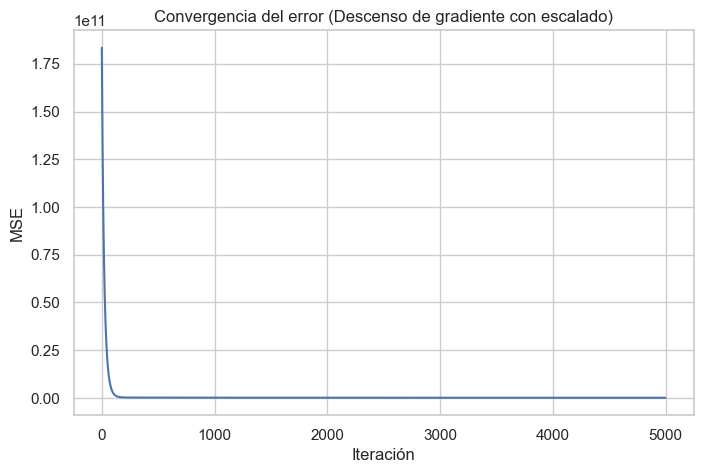

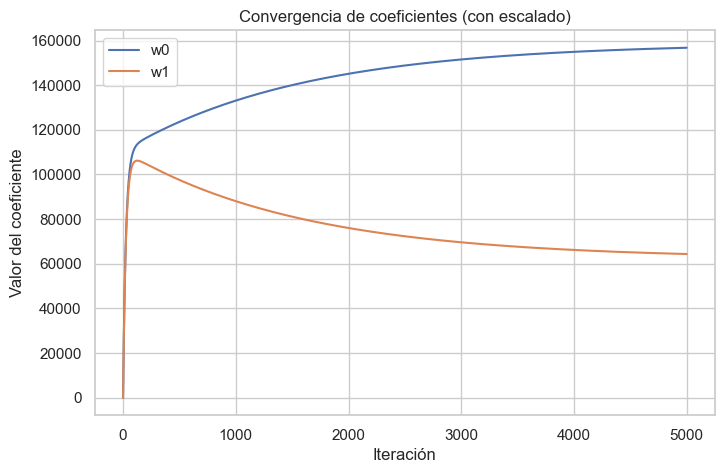

In [9]:
# Escalado de variables polinomiales para descenso de gradiente
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)

# Descenso de gradiente manual con variables escaladas
m, n = X_train_poly_scaled.shape
w_s = np.zeros(n)
b_s = 0
alpha_s = 0.01
n_iter_s = 5000
losses_s = []
ws_s = []

for i in range(n_iter_s):
    y_pred_s = X_train_poly_scaled @ w_s + b_s
    error_s = y_pred_s - y_train.values
    loss_s = (error_s ** 2).mean()
    losses_s.append(loss_s)
    ws_s.append(w_s.copy())
    grad_w_s = (2/m) * (X_train_poly_scaled.T @ error_s)
    grad_b_s = (2/m) * error_s.sum()
    w_s -= alpha_s * grad_w_s
    b_s -= alpha_s * grad_b_s

# Gráfica de convergencia del error
plt.plot(losses_s)
plt.title('Convergencia del error (Descenso de gradiente con escalado)')
plt.xlabel('Iteración')
plt.ylabel('MSE')
plt.show()

# Gráfica de convergencia de los primeros coeficientes
ws_s = np.array(ws_s)
for j in range(min(3, n)):
    plt.plot(ws_s[:, j], label=f'w{j}')
plt.title('Convergencia de coeficientes (con escalado)')
plt.xlabel('Iteración')
plt.ylabel('Valor del coeficiente')
plt.legend()
plt.show()

In [10]:
# Tabla comparativa de métricas de los modelos lineal y polinomial
import pandas as pd
resultados = pd.DataFrame({
    'Modelo': ['Lineal', 'Polinomial'],
    'MSE prueba': [mse_test, mse_poly_test],
    'R2 prueba': [r2_test, r2_poly_test]
})
display(resultados)

,Modelo,MSE prueba,R2 prueba
0,Lineal,2.706616e+08,0.993892
1,Polinomial,9.485187e+07,0.997860


# 6. Conclusiones

1. La ingeniería de variables, como la creación de la variable `area_lote`, y la transformación polinomial permiten capturar relaciones no lineales y mejorar significativamente el desempeño de los modelos de regresión. La selección adecuada de variables y la exploración visual son pasos fundamentales para el éxito del modelado.

2. El escalado de características es esencial para la eficiencia y estabilidad de los algoritmos de optimización, como el descenso de gradiente. Sin un preprocesamiento adecuado, los modelos pueden presentar dificultades de convergencia y menor precisión predictiva.

3. La comparación de métricas evidencia que el modelo polinomial supera al modelo lineal cuando la relación subyacente es no lineal. El análisis sistemático y la validación con datos no vistos aseguran la robustez y generalización de los resultados obtenidos.